# K-Means Clustering
## <a href="#I">I Introduction</a>
## <a href="#II">II Implementing K-Means with Scikit-Learn</a>
### <a href="#II.1">II.1 Preparing the Data</a>
### <a href="#II.2">II.2 Running the algorithm</a>
### <a href="#II.3">II.3 Evaluating the algorithm</a>
### <a href="#II.4">II.4 Advantages and Disadvantages</a>

# K-Means Clustering

<a id="I"></a>
## I Introduction

K-means clustering is one of the most widely used __unsupervised__ machine learning algorithms that forms __clusters__ of data based on the similarity between data instances. <br>

__Note__: For this particular algorithm to work, the number of clusters has to be defined beforehand. The __K__ in the __K-means__ refers to the number of clusters.

The K-means algorithm starts by randomly choosing a centroid value for each cluster. <br>

After that the algorithm iteratively performs three steps:
 
1. Find the Euclidean distance between each data instance and centroids of all the clusters. 
2. Assign the data instances to the cluster of the centroid with nearest distance. 
3. Calculate new centroid values based on the mean values of the coordinates of all the data instances from the corresponding cluster.
4. The iterations continue until the centroid values converge.

To classify a new data point, the distance between the data point and the centroids of the clusters is calculated. Data point is assigned to the cluster whose centroid is closest to the data point.

<a id="II"></a>
## II Implementing K-Means with Scikit-Learn

We will be using the __iris dataset__ to see how the algorithm work. The data set contains information of 3 classes of the iris plant with the following attributes: - sepal length - sepal width - petal length - petal width - class: Iris Setosa, Iris Versicolour, Iris Virginica

The task is to predict the class of the iris plant based on the attributes. 


In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all" # default is 'last'
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the iris data
data = load_iris()
print('Classes to predict: ', data.target_names)
print(f'K-Means will have to identify {len(data.target_names)} clusters')

Classes to predict:  ['setosa' 'versicolor' 'virginica']
K-Means will have to identify 3 clusters


<a id="II.1"></a>
### II.1 Preparing the Data

Preparing the data involves:

1. Dividing the data into attributes and labels 

Number of examples in the data: 150


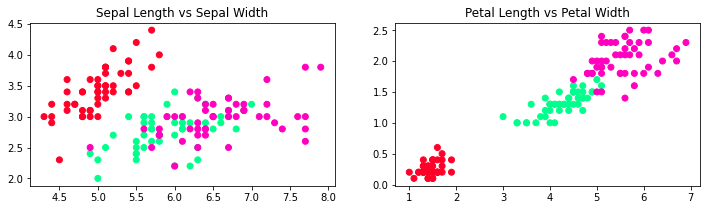

In [3]:
# Let’s convert our arrays to a pandas DataFrame for ease of use. I am setting the column names explicitly.
x = pd.DataFrame(data.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(data.target, columns=['Target'])
print('Number of examples in the data:', x.shape[0])

# Let’s have a look at our data through a scatter plot to see if there is any pattern visible.
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)

plt.scatter(x['Sepal Length'], x['Sepal Width'],c=data.target, cmap='gist_rainbow')
plt.title('Sepal Length vs Sepal Width')
plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'],c=data.target, cmap='gist_rainbow')
plt.title('Petal Length vs Petal Width');


We can clearly see the grouping in the plots with the red dots, which correspond to species Setosa. The green and pink dots are not so clearly separable.
<br>

<a id="II.2"></a>
### II.2 Running the algorithm 

Now let’s use the KMeans algorithm to see if it can create the clusters automatically.

In [4]:
model = KMeans(n_clusters=3)
# the fit() method runs the algo on the data and creates the clusters. 
# Each sample in the dataset is then assigned a cluster id (0, 1, 2).
model.fit(x)
 
model.labels_ # holds the array of the cluster ids (it should be similar to data.target)


KMeans(n_clusters=3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

__Note__: _data.target_ is an array of integers used to represent the Iris species. 0=Setosa, 1=Versicolor, 2=Virginica.<br>
The KMeans model object also assigns integer ids for the three clusters (n_clusters=3 above), namely 0, 1, 2. <br>
The KMeans model has no knowledge of the _iris.target_ data, and the cluster numbers will presumably not match the species numbers (here, after classification cluster 1= correspond to Setosa, 2=Versicolor, 0=Virginica).<br>

<a id="II.3"></a>
### II.3 Evaluating the algorithm

To verify the output of the model, let’s visualise it: we can see that all the red dots are grouped/clustered 100% accurately and the pink and green dots are fairly well grouped too.


<Figure size 864x216 with 0 Axes>

Text(0.5, 1.0, 'Sepal Length vs Sepal Width: before classification')

Text(0.5, 1.0, 'Sepal Length vs Sepal Width: after classification')

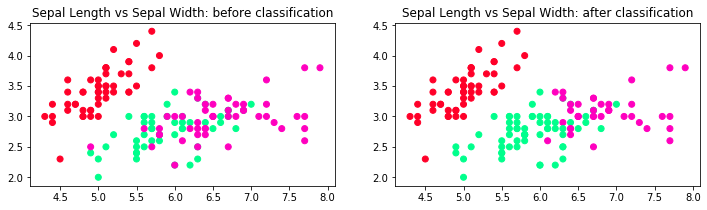

In [5]:
predictedY = np.choose(model.labels_, [2, 0, 1]).astype(np.int64) 
# to make the cluster numbers match the original classes

plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'],c=data.target, cmap='gist_rainbow')
plt.title('Sepal Length vs Sepal Width: before classification')
plt.subplot(1,2,2)
plt.scatter(x['Sepal Length'], x['Sepal Width'],c=predictedY, cmap='gist_rainbow')
plt.title('Sepal Length vs Sepal Width: after classification')

<a id="II.4"></a>
### II.4 Advantages and Disadvantages

Here is a list of the main advantages and disadvantages of this algorithm:<br>

Advantages:
- K-Means is simple and computationally efficient.
- It is very intuitive and its results are easy to visualize.<br>

Disadvantages:
- K-Means is highly scale dependent and is not suitable for data of varying shapes and densities.
- Evaluating results is more subjective. It requires much more human evaluation than trusted metrics.